In [1]:
import sys
import os
path = '/home/keisuke/Documents/UT/TODO lab/QBM/qiskit'
if path not in sys.path:
    sys.path.append(path)

In [25]:
import numpy as np
from qiskit import *
import qiskit.quantum_info as qi
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from qiskit.quantum_info.operators import Operator
from sklearn.linear_model import Ridge, LinearRegression
import numpy as np

from functions import utils_, evolve
from importlib import reload
import scipy

%matplotlib inline

In [3]:
reload(utils_)
reload(evolve)
ham_dict = {}
ham_dict['ham'] = ['zz']
ham_dict['pos'] = [[0,1]]

# ham_dict['c'] = [3,2]
ham_dict['c'] = np.array([0.5])

n = (np.array(ham_dict['pos']).max() + 1) * 2
VQS_ = utils_.VQS(n)
VQS_.set_ham(ham_dict)



In [5]:
QITE = evolve.time_evolution(VQS_, backend_name='FakeSydney')
# ham_dict['c'] = np.array([0.1, 1.0, 1.0, 0.5], dtype=np.float64)
_, fid_ = QITE.seq_QITE(ham_dict, rate=10, n_iter = 10**3)


backend :  aer_simulator(fake_sydney)
backend :  aer_simulator(fake_sydney)


In [6]:
QITE = evolve.time_evolution(VQS_, backend_name=None)
# ham_dict['c'] = np.array([0.1, 1.0, 1.0, 0.5], dtype=np.float64)
_, fid2_ = QITE.seq_QITE(ham_dict, rate=10, n_iter = 10**3)

[0.959929598823055,
 0.9727337548457538,
 0.9822657519015773,
 0.9898825498385845,
 0.9955221272841901]

In [12]:
QITE = evolve.time_evolution(VQS_)
ham_dict['c'] = np.array([0.1, 1.0, 1.0, 0.5], dtype=np.float64)
fid = []
for _ in range(3):
    if _ == 0:
        _, fid_ = QITE.seq_QITE(ham_dict, rate=20, n_iter = 10**3)
    else:
        _, fid_ = QITE.seq_QITE(ham_dict, rate=10, n_iter = 10**4)
    ham_dict['c'] += np.random.normal(scale=0.2, size=4)
    print(QITE.old_c, fid_[-1])
    fid.append(fid_[-1])

[0.1 1.  1.  0.5] 0.7651906687104837
[-0.12007944 -0.15205821  0.04313793 -0.02165557]
[-0.02007944  0.84794179  1.04313793  0.47834443] 0.8139917315455689
[ 0.00581706 -0.0897129  -0.01131737  0.03203874]
[-0.01426238  0.75822889  1.03182056  0.51038317] 0.8286247530059402


In [21]:
s = VQS_.state()
s2 = VQS_.state()
s.ccx(0,1,2)

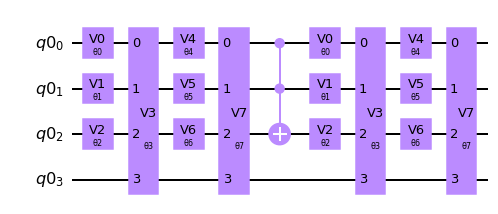

In [23]:
s = s.combine(s2)
s.draw('mpl')

In [24]:
from qiskit.test.mock import FakeSydney
from qiskit.providers.aer import AerSimulator

device_backend = FakeSydney()
# backend = AerSimulator.from_backend(device_backend)
backend = Aer.get_backend('aer_simulator')

theta = np.zeros(VQS_.n_params)
circ = VQS_.state()

tcirc = transpile(circ, backend)


params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}

tcirc = tcirc.bind_parameters(params)

cr = ClassicalRegister(int(VQS_.n/2),'c')
tcirc.add_register(cr)
tcirc.measure([i for i in range(int(VQS_.n/2))], [i for i in range(int(VQS_.n/2))])
# # Execute noisy simulation and get counts
result = execute(tcirc, backend, shots=1000).result()
counts_noise = result.get_counts(0)

In [64]:
VQS_

In [67]:
from qiskit.test.mock import *

In [70]:
function_name = "FakeSydney"
eval(function_name + "()")

<FakeSydney('fake_sydney') from None()>

In [43]:
tcirc.add_register(cr)

In [49]:

tcirc.draw('mpl')

AttributeError: 'InstructionSet' object has no attribute 'measure'

In [758]:
estimator = utils_.estimate_params3(VQS_)
# theta = np.zeros(VQS_.n_params)

In [759]:
#### from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix

tau = 0
fid_list = []
rho_list = []
N_ = [5]
for N in N_:
    delta = (1/2)/N

#     theta = np.zeros(VQS_.n_params)
    i = 0
    while True:

        estimator.set_theta(theta)
        A,C = estimator.estimate_AC(NUM = 5*10**4)
        
#         est2.params = params
#         A, C = est2.estimate_AC(NUM = 10**3)
        clf = Ridge(fit_intercept=False, alpha=1e-6)
        clf.fit(A, C)
#         clf = LinearRegression().fit(A, C)
        theta += clf.coef_ * delta
        tau += delta
        
        
        
#         gibbs_1_density = DensityMatrix(gibbs_1)
        gibbs_1 = scipy.linalg.expm(-(VQS2_.return_ham(boltzmann=True)))
        gibbs_1 /= np.trace(gibbs_1)



        gibbs_1_density = DensityMatrix(gibbs_1)

        
        params = {VQS_.P[i] : theta[i] for i in range(VQS_.n_params)}
        rho1 = VQS_.state().bind_parameters(params)
        out = Statevector.from_instruction(rho1)
        rho1_ = partial_trace(out,[2,3])

        Fidelity = qi.state_fidelity(rho1_, gibbs_1_density)
        fid_list.append(Fidelity)
        rho_list.append(rho1)
        
        print('i = {} tau={}: F = {:.5f}'.format(i, round(tau,3), Fidelity))

        
        
        if round(tau,3) >= 1/2:
            break
        i += 1


i = 0 tau=0.1: F = 0.98976
i = 1 tau=0.2: F = 0.99493
i = 2 tau=0.3: F = 0.99807
i = 3 tau=0.4: F = 0.99963
i = 4 tau=0.5: F = 0.99992


In [ ]:
evolve